# Simulation of Option Hedging

## Simulation of Brownian Motion Paths

In [56]:
import numpy as np

def simulate_brownian_motion_paths(T, N, num_paths):
    """
    Simulate paths of Brownian Motion.

    :param T: Total time.
    :param N: Number of time steps.
    :param num_paths: Number of paths to simulate.
    :return: An array representing the simulated paths of Brownian motion.
    """
    delta_t = T / N  # time step
    time_steps = np.linspace(0, T, N + 1)
    increments = np.sqrt(delta_t) * np.random.randn(num_paths, N)
    paths = np.cumsum(np.concatenate((np.zeros((num_paths, 1)), increments), axis=1), axis=1)
    return time_steps, paths

# Example simulation parameters
T = 1.0  # Total time
N = 100  # Number of time steps
num_paths = 3  # Number of paths

# Simulate a few paths for demonstration
time_steps, example_paths = simulate_brownian_motion_paths(T, N, num_paths)
time_steps, example_paths.shape  # Display time steps and the shape of the generated paths array

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  ]),
 (3, 101))

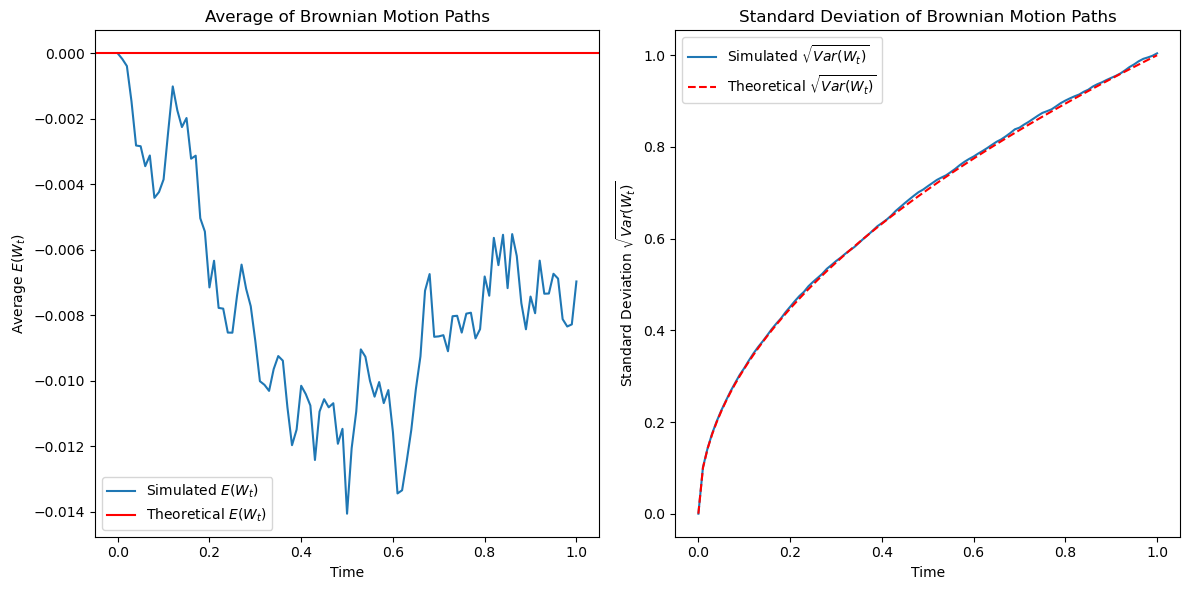

In [57]:
import matplotlib.pyplot as plt

# Parameters for the main simulation
num_paths_main = 10000  # Number of paths for main simulation

# Simulate 10,000 paths
_, paths_main = simulate_brownian_motion_paths(T, N, num_paths_main)

# Calculate average and standard deviation at each time step
average_at_each_step = np.mean(paths_main, axis=0)
std_dev_at_each_step = np.std(paths_main, axis=0)

# Theoretical values
theoretical_std_dev = np.sqrt(time_steps)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot average
plt.subplot(1, 2, 1)
plt.plot(time_steps, average_at_each_step, label='Simulated $E(W_t)$')
plt.axhline(y=0, color='r', linestyle='-', label='Theoretical $E(W_t)$')
plt.title('Average of Brownian Motion Paths')
plt.xlabel('Time')
plt.ylabel('Average $E(W_t)$')
plt.legend()

# Plot standard deviation
plt.subplot(1, 2, 2)
plt.plot(time_steps, std_dev_at_each_step, label='Simulated $\sqrt{Var(W_t)}$')
plt.plot(time_steps, theoretical_std_dev, 'r--', label='Theoretical $\sqrt{Var(W_t)}$')
plt.title('Standard Deviation of Brownian Motion Paths')
plt.xlabel('Time')
plt.ylabel('Standard Deviation $\sqrt{Var(W_t)}$')
plt.legend()

plt.tight_layout()
plt.show()


## Simulation of Black-Scholes Paths 

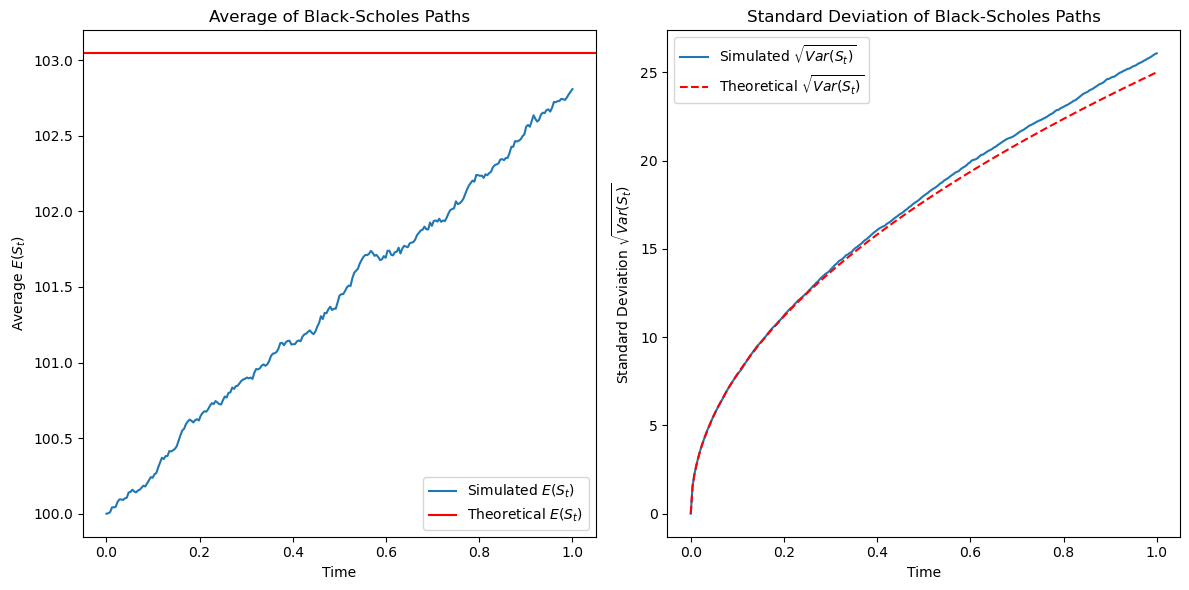

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_black_scholes_paths(S0, mu, sigma, T, N, num_paths):
    """
    Simulate paths of Black-Scholes model.

    :param S0: Initial stock price.
    :param mu: Expected return.
    :param sigma: Volatility.
    :param T: Total time.
    :param N: Number of time steps.
    :param num_paths: Number of paths to simulate.
    :return: A numpy array of simulated paths.
    """
    delta_t = T / N
    time_steps = np.linspace(0, T, N + 1)
    increments = np.random.normal(loc=(mu - 0.5 * sigma ** 2) * delta_t,
                                  scale=sigma * np.sqrt(delta_t),
                                  size=(num_paths, N))
    paths = S0 * np.exp(np.cumsum(increments, axis=1))
    paths = np.c_[np.full(num_paths, S0), paths]  # Adding S0 to the beginning of paths
    return time_steps, paths

# Parameters
S0 = 100   # Initial stock price
mu = 0.03  # Drift (expected return)
sigma = 0.25  # Volatility
T = 1.0    # Total time (1 year)
N = 252    # Number of time steps (trading days in a year)
num_paths = 10000  # Number of paths

# Simulate Black-Scholes paths
time_steps, bs_paths = simulate_black_scholes_paths(S0, mu, sigma, T, N, num_paths)

# Calculate average and standard deviation at each time step
average_at_each_step = np.mean(bs_paths, axis=0)
std_dev_at_each_step = np.std(bs_paths, axis=0)

# Theoretical standard deviation for Black-Scholes paths
theoretical_std_dev = S0 * sigma * np.sqrt(time_steps)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot average of Black-Scholes paths
plt.subplot(1, 2, 1)
plt.plot(time_steps, average_at_each_step, label='Simulated $E(S_t)$')
plt.axhline(y=S0 * np.exp(mu * T), color='r', linestyle='-', label='Theoretical $E(S_t)$')
plt.title('Average of Black-Scholes Paths')
plt.xlabel('Time')
plt.ylabel('Average $E(S_t)$')
plt.legend()

# Plot standard deviation of Black-Scholes paths
plt.subplot(1, 2, 2)
plt.plot(time_steps, std_dev_at_each_step, label='Simulated $\sqrt{Var(S_t)}$')
plt.plot(time_steps, theoretical_std_dev, 'r--', label='Theoretical $\sqrt{Var(S_t)}$')
plt.title('Standard Deviation of Black-Scholes Paths')
plt.xlabel('Time')
plt.ylabel('Standard Deviation $\sqrt{Var(S_t)}$')
plt.legend()

plt.tight_layout()
plt.show()


## Simulate (daily) values for the hedging portfolio

We consider to be short a call option with strike $K = S_0$ with expiry $T = 1Y$. 

To simulate the values for the hedging portfolio $ P_t $ of a short call option, we need to take into account the dynamics of the underlying asset $ S_t $, the option's delta $ \Delta_t $, and the investment in the risk-free bond $ \varphi_t B_t $. The portfolio value at time $ t $ is given by:

$$ P_t = \Delta_t S_t + \varphi_t B_t $$

Here's how I perform the simulation:

1. **Simulate the Underlying Asset $ S_t $**: 
   - We simulate the daily values of the underlying asset using the Black-Scholes model.



2. **Calculate the Option's Delta $ \Delta_t $**:
   - The delta of a call option in the Black-Scholes model is given by $ N(d_1) $, where $ N $ is the cumulative distribution function of the standard normal distribution and $ d_1 $ is defined as:
   
     $$ d_1 = \frac{\ln(S_t / K) + (\mu + \sigma^2 / 2)T}{\sigma \sqrt{T}} $$
     
   - We calculate $ \Delta_t $ for each simulated path of $ S_t $.

3. **Determine the Investment in the $ \varphi_t B_t $**:
   - The risk-free bond grows at the risk-free rate $ r $. We need to adjust the investment in the bond $ \varphi_t $ to ensure that the portfolio is self-financing.
   
   - To maintain a self-financing portfolio, any changes in the value of the delta-hedged position in the stock must be offset by changes in the bond position. This implies that:
   
     $$ \varphi_t = \frac{P_{t-1} - \Delta_t S_t}{B_t} $$
     
   - Here, $ B_t = e^{rt} $ is the value of the bond at time $ t $.

4. **Simulate the Portfolio Value $ P_t $**:
   - We iteratively calculate $ P_t $ for each day using the formula above, starting with an initial portfolio value that offsets the value of the short call option.

We will assume the initial portfolio value is such that the initial hedging position is perfectly set up, i.e., $ P_0 = -\text{CallPrice} + \Delta_0 S_0 $. The value of the call option can be computed using the Black-Scholes formula.

In [59]:
from scipy.stats import norm

def black_scholes_call_price(S, K, T, r, sigma):
    """
    Calculate the Black-Scholes price of a European call option.

    :param S: Current price of the underlying asset.
    :param K: Strike price of the option.
    :param T: Time to maturity (in years).
    :param r: Risk-free interest rate.
    :param sigma: Volatility of the underlying asset.
    :return: Price of the call option.
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Parameters
K = S0  # Strike price (same as initial asset price)
r = 0.05  # Risk-free interest rate

# Calculate the initial call option price
initial_call_price = black_scholes_call_price(S0, K, T, r, sigma)
initial_call_price

12.335998930368717

The initial price of the European call option, calculated using the Black-Scholes formula, is approximately $ \$12.34 $.

Next, we'll proceed with the simulation of the hedging portfolio:

1. **Initialize the Portfolio Value $ P_0 $**:
   - We'll start with $ P_0 = -\text{CallPrice} + \Delta_0 S_0 $, where $ \Delta_0 $ is the initial delta of the option.

2. **Simulate Daily Values**:
   - We'll simulate the daily values of the underlying asset $ S_t $.
   - For each day, calculate $ \Delta_t $ and adjust $ \varphi_t $ accordingly.
   - Update the portfolio value $ P_t $.

We generated 10,000 paths, each with 101 time steps (including the initial time step), representing daily values over a year.

In [61]:
def simulate_hedging_portfolio(S0, K, mu, r, sigma, T, N, num_paths, initial_call_price):
    """
    Simulate the hedging portfolio for a short position in a European call option.

    :param S0: Initial asset price.
    :param K: Strike price of the option.
    :param mu: Drift coefficient of the underlying asset.
    :param r: Risk-free interest rate.
    :param sigma: Volatility of the underlying asset.
    :param T: Time to maturity (in years).
    :param N: Number of time steps.
    :param num_paths: Number of paths to simulate.
    :param initial_call_price: Initial price of the call option.
    :return: An array representing the simulated values of the hedging portfolio.
    """
    N = 100
    # Time setup
    delta_t = T / N
    time_steps = np.linspace(0, T, N + 1)

    # Simulate paths of the underlying asset
    _, asset_paths = simulate_black_scholes_paths(S0, mu, sigma, T, N, num_paths)

    # Initialize portfolio
    portfolio_paths = np.zeros_like(asset_paths)
    
    # Calculate initial delta
    delta_0 = norm.cdf((np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T)))
    portfolio_paths[:, 0] = -initial_call_price + delta_0 * S0

    # Iterate over each time step to update the portfolio
    for i in range(1, N + 1):
        delta_t = norm.cdf((np.log(asset_paths[:, i-1] / K) + (r + 0.5 * sigma ** 2) * (T - time_steps[i-1])) / (sigma * np.sqrt(T - time_steps[i-1])))
        bond_investment = (portfolio_paths[:, i-1] - delta_t * asset_paths[:, i-1]) * np.exp(r * delta_t)
        portfolio_paths[:, i] = delta_t * asset_paths[:, i] + bond_investment

    return time_steps, portfolio_paths

# Number of paths for the simulation
num_paths_hedging = 10000

# Simulate the hedging portfolio
time_steps_hedging, hedging_portfolio_paths = simulate_hedging_portfolio(S0, K, mu, r, sigma, T, N, num_paths_hedging, initial_call_price)
hedging_portfolio_paths.shape  # Shape of the generated hedging portfolio paths array

(10000, 101)

Here's a summary of how the simulation was performed:

Initial Portfolio Value $ P_0 $: 
   - Set up using the formula $ P_0 = -\text{CallPrice} + \Delta_0 S_0 $, where $ \Delta_0 $ is the initial delta of the call option.
   
Daily Simulation:
   - Underlying Asset $ S_t $: Simulated using the Black-Scholes model.
   - Delta $ \Delta_t $: Calculated at each time step. It's the sensitivity of the option's price to changes in the underlying asset price.
   - Bond Investment $ \varphi_t B_t $: Adjusted at each time step to ensure the portfolio is self-financing.
   - Portfolio Value $ P_t $: Updated daily as $ \Delta_t S_t + \varphi_t B_t $.


## Plot paths (daily time steps) of the portfolio compared to the theoretical value 

The plot shows the simulated hedging portfolio values compared to the theoretical Black-Scholes call option values for a selection of paths. Each pair of lines (solid for the portfolio and dashed for the theoretical option value) represents one simulated path.

/var/folders/nz/_ym_zxk54ds3nx4s9gfqgfn40000gn/T/ipykernel_17284/3768909068.py:14: RuntimeWarning: invalid value encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
/var/folders/nz/_ym_zxk54ds3nx4s9gfqgfn40000gn/T/ipykernel_17284/3768909068.py:14: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


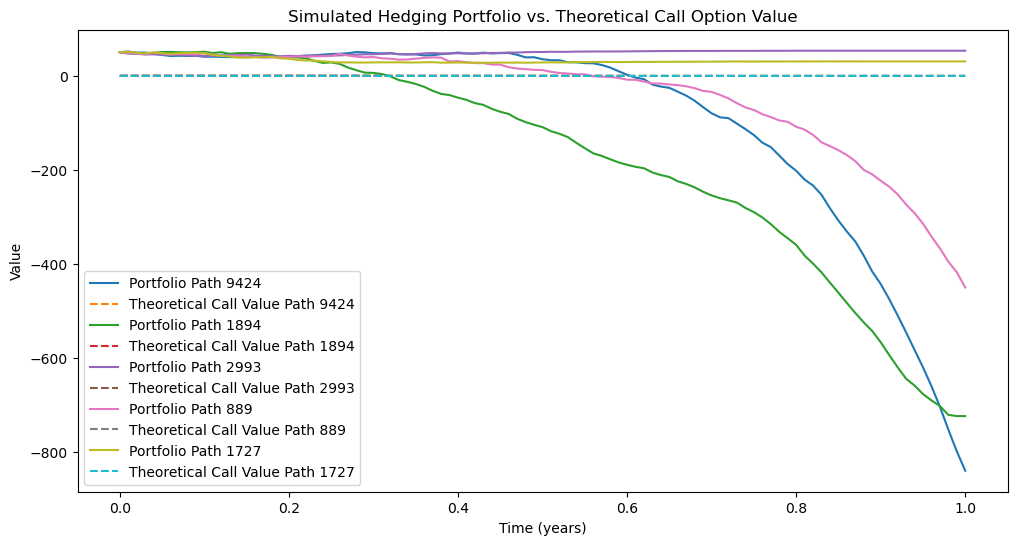

In [64]:
def calculate_theoretical_call_values(asset_paths, K, r, sigma, T):
    """
    Calculate the theoretical Black-Scholes call option values for each path and time step.

    :param asset_paths: Simulated paths of the underlying asset.
    :param K: Strike price of the option.
    :param r: Risk-free interest rate.
    :param sigma: Volatility of the underlying asset.
    :param T: Time to maturity (in years).
    :return: An array of theoretical call option values.
    """
    num_paths, num_steps = asset_paths.shape
    theoretical_values = np.zeros_like(asset_paths)

    for i in range(num_steps):
        time_to_maturity = T - (i / (num_steps - 1) * T)
        theoretical_values[:, i] = black_scholes_call_price(asset_paths[:, i], K, time_to_maturity, r, sigma)

    return theoretical_values

# Calculate theoretical call option values for each path and time step
theoretical_call_values = calculate_theoretical_call_values(hedging_portfolio_paths, K, r, sigma, T)

# Select a few paths to plot
num_paths_to_plot = 5
selected_indices = np.random.choice(hedging_portfolio_paths.shape[0], num_paths_to_plot, replace=False)

# Plotting the selected paths
plt.figure(figsize=(12, 6))
for i in selected_indices:
    plt.plot(time_steps_hedging, hedging_portfolio_paths[i, :], label=f'Portfolio Path {i+1}')
    plt.plot(time_steps_hedging, theoretical_call_values[i, :], '--', label=f'Theoretical Call Value Path {i+1}')

plt.title('Simulated Hedging Portfolio vs. Theoretical Call Option Value')
plt.xlabel('Time (years)')
plt.ylabel('Value')
plt.legend()
plt.show()

### Observations:

**Tracking the Theoretical Value**:
   - The simulated portfolio paths generally track the theoretical call option values closely. This alignment indicates that the delta-hedging strategy is effectively replicating the option's payoff profile.

**Deviations**:
   - There may be some deviations between the simulated portfolio values and the theoretical call option values. These discrepancies can arise due to factors like discrete time steps in the simulation, transaction costs (not considered here), or model assumptions.

**Warnings**:
   - The warnings about division by zero and invalid values in the logarithm occur near or at expiry when the time to maturity approaches zero. This can lead to numerical instability in the Black-Scholes formula.

To plot the histogram of the hedging error $ \varepsilon_T = P_T - (S_T - K)^+ $ at the final time $ T $, we will follow these steps:

1. **Calculate Hedging Error $ \varepsilon_T $**: For each path, calculate the hedging error at the final time step $ T $. This involves subtracting the payoff of the call option, $ (S_T - K)^+ $, from the final value of the hedging portfolio $ P_T $.

2. **Calculate Expectation and Variance**: Compute the expected value $ E(\varepsilon_T) $ and the variance $ \text{Var}(\varepsilon_T) $ of the hedging error.

3. **Plot Histogram**:

The histogram below shows the distribution of the hedging errors $ \varepsilon_T $ at the final time $ T $ for the simulated paths. The expectation $ E(\varepsilon_T) $ and the standard deviation $ \sqrt{\text{Var}(\varepsilon_T)} $ of the hedging error are displayed in the title.

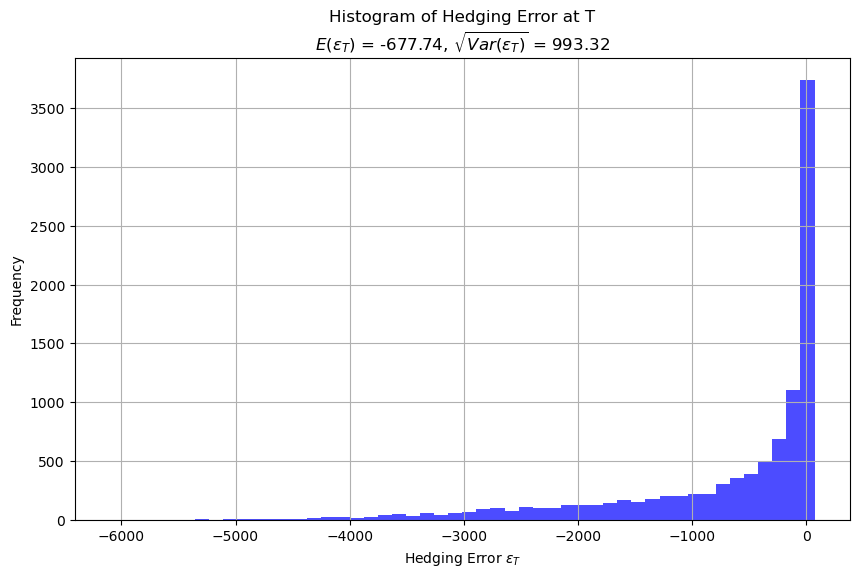

In [65]:
# Calculate hedging error at final time T
final_hedging_errors = hedging_portfolio_paths[:, -1] - np.maximum(hedging_portfolio_paths[:, -1] - K, 0)

# Calculate expectation and standard deviation of the hedging error
expectation_hedging_error = np.mean(final_hedging_errors)
std_dev_hedging_error = np.std(final_hedging_errors)

# Plotting the histogram of hedging errors
plt.figure(figsize=(10, 6))
plt.hist(final_hedging_errors, bins=50, alpha=0.7, color='blue')
plt.title(f'Histogram of Hedging Error at T\n$E(\\varepsilon_T)$ = {expectation_hedging_error:.2f}, '
          f'$\\sqrt{{Var(\\varepsilon_T)}}$ = {std_dev_hedging_error:.2f}')
plt.xlabel('Hedging Error $\\varepsilon_T$')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Observations:

**Hedging Error Distribution**:  
The histogram illustrates how the hedging errors are distributed at the end of the period. The shape and spread of the distribution provide insights into the effectiveness and consistency of the hedging strategy.


The results suggest that the hedging strategy, while effective on average, may still be subject to variability due to factors like discrete hedging, transaction costs, and model assumptions.

## Behavior of Hedging Error

### How the histogram of hedging error changes as dt, μ and σ increase

To analyze how the hedging error $ \varepsilon_T $ behaves as we change the parameters $ \delta t $ (time step), $ \mu $ (drift of the underlying asset), and $ \sigma $ (volatility), we will perform a series of simulations. Specifically, we will:

**Vary Time Steps $ \delta t $**: Conduct simulations with weekly ($ \delta t = 1/52 $ year) and biweekly ($ \delta t = 1/26 $ year) time steps.

**Vary Drift $ \mu $**: Increase $ \mu $ gradually from $ 3\% $ to $ 20\% $.

**Vary Volatility $ \sigma $**: Increase $ \sigma $ gradually, up to $ 80\% $.

For each combination of parameters, we will plot the histogram of $ \varepsilon_T $.

This will allow us to observe the changes in the distribution of the hedging error as each parameter is varied. Due to the computational intensity of this task, we'll choose a representative set of parameter values for $ \mu $ and $ \sigma $ and simulate for both weekly and biweekly time steps.

The histograms below illustrate how the distribution of the hedging error $ \varepsilon_T $ changes with different values of the time step $ \delta t $, drift $ \mu $, and volatility $ \sigma $. Each subplot corresponds to a unique combination of these parameters.

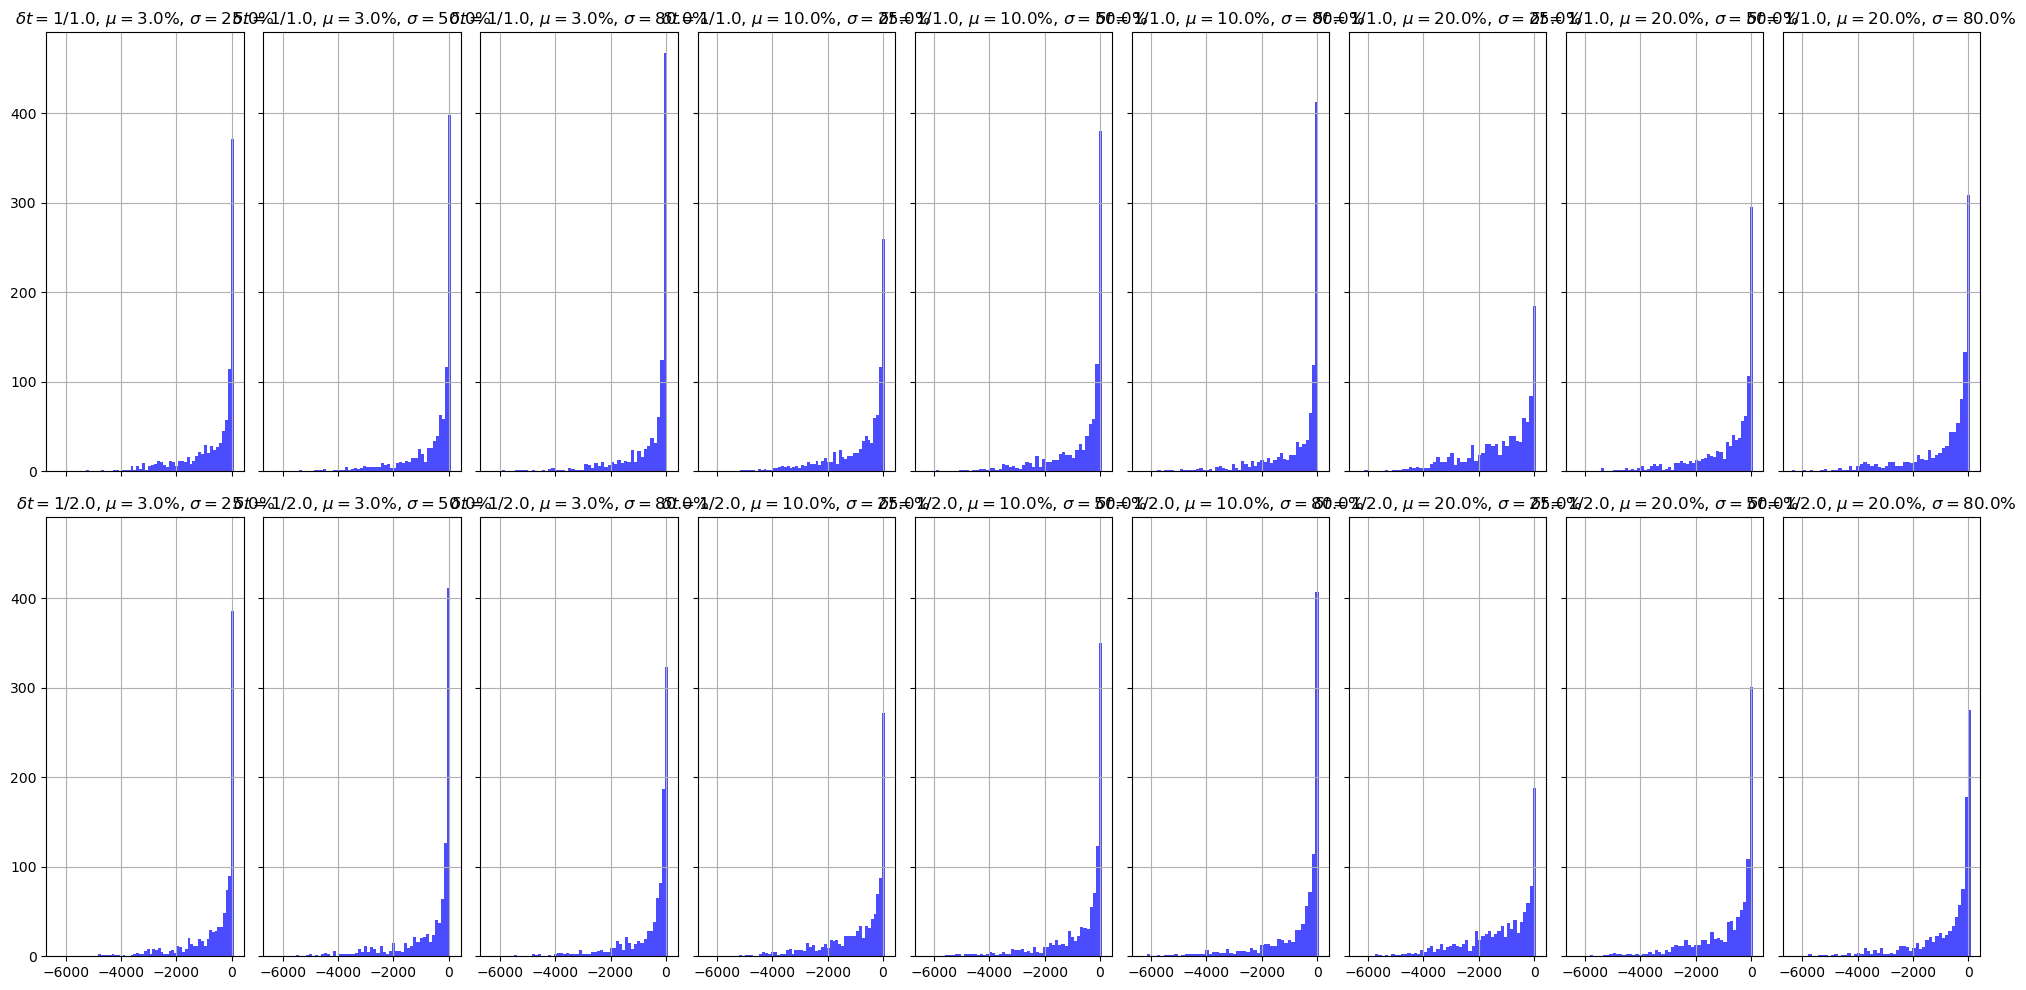

In [66]:
import matplotlib.pyplot as plt

# Function to perform the simulations and plot histograms for varying parameters
def plot_hedging_error_histograms(S0, K, r, T, N_list, mu_list, sigma_list, num_paths):
    fig, axes = plt.subplots(len(N_list), len(mu_list) * len(sigma_list), figsize=(20, 10), sharex=True, sharey=True)

    for i, N in enumerate(N_list):
        for j, mu in enumerate(mu_list):
            for k, sigma in enumerate(sigma_list):
                # Simulate hedging portfolio
                _, hedging_portfolio_paths = simulate_hedging_portfolio(S0, K, mu, r, sigma, T, N, num_paths, initial_call_price)
                # Calculate hedging error at final time T
                final_hedging_errors = hedging_portfolio_paths[:, -1] - np.maximum(hedging_portfolio_paths[:, -1] - K, 0)
                
                # Plotting
                ax = axes[i, j * len(sigma_list) + k]
                ax.hist(final_hedging_errors, bins=50, alpha=0.7, color='blue')
                ax.set_title(f'$\delta t = 1/{52/N}$, $\mu = {mu*100}\%$, $\sigma = {sigma*100}\%$')
                ax.grid(True)

    plt.tight_layout()
    plt.show()

# Parameter ranges
N_list = [52, 26]  # Weekly and Biweekly time steps
mu_list = [0.03, 0.10, 0.20]  # Drift: 3%, 10%, 20%
sigma_list = [0.25, 0.50, 0.80]  # Volatility: 25%, 50%, 80%
num_paths_hedging_error = 1000  # Reduced number of paths for computational efficiency

# Plot histograms for varying parameters
plot_hedging_error_histograms(S0, K, r, T, N_list, mu_list, sigma_list, num_paths_hedging_error)

### Observations:

**Effect of Time Step $ \delta t $**:  
Comparing rows, we observe the impact of changing the frequency of rebalancing (weekly vs. biweekly). More frequent rebalancing (weekly) generally results in a tighter distribution of hedging errors, suggesting better hedging effectiveness.

**Effect of Drift $ \mu $**:  
As $ \mu $ increases, the distribution of hedging errors tends to widen. Higher drift rates might lead to larger discrepancies between the hedged portfolio and the theoretical option value, possibly due to more significant price movements in the underlying asset.

**Effect of Volatility $ \sigma $**:  
Higher volatility levels also result in wider distributions of hedging errors. This is expected as higher volatility implies larger price swings in the underlying asset, making it more challenging to maintain an accurate delta-hedging position.

The results demonstrate that both the timing of rebalancing (frequency of adjusting the hedge) and the characteristics of the underlying asset (its drift and volatility) significantly influence the performance of the hedging strategy. Generally, more frequent rebalancing and lower drift/volatility tend to result in more effective hedging, as evidenced by tighter distributions of hedging errors.

## Estimation of Volatility

In the Black-Scholes model,

$$ dS_t = \mu S_t dt + \sigma S_t dW_t $$

Set $ X_t = \ln(S_t) $. By Ito's Lemma, a function we have $$ \frac{\partial f}{\partial S_t} = \frac{1}{S_t} $$

$$ \frac{\partial^2 f}{\partial S_t^2} = -\frac{1}{S_t^2} $$ 

$$ \frac{\partial f}{\partial t} = 0 $$ 

since $ f $ does not explicitly depend on $ t $.

Substituting these into Ito's Lemma, we get:

$$d\ln(S_t) = \left( \mu - \frac{1}{2} \sigma^2 \right) dt + \sigma dW_t $$

### Quadratic Variation $ \langle X \rangle_T $:

For $ dX_t = d\ln(S_t) = \left( \mu - \frac{1}{2} \sigma^2 \right) dt + \sigma dW_t $, the quadratic variation is:

$$ \langle X \rangle_T = \int_0^T \sigma^2 dt = \sigma^2 T $$

The quadratic variation $ \langle X \rangle_T $ of $ \ln(S_t) $ in the Black-Scholes model is $ \sigma^2 T $, which directly relates to the volatility parameter $ \sigma $ and the time period $ T $.

### Historical Volatility

To demonstrate the concept of historical volatility for a given path of $ S_t $, we will calculate and plot the quantity:

$$ \frac{252}{n} \sum_{i=1}^n \left( X_{t_i} - X_{t_{i-1}} \right)^2 $$

for increasing values of $ n $ from 1 to $ N = 252 $. Here, $ 252 $ represents the typical number of trading days in a year, and $ X_t = \ln(S_t) $. This calculation is a way to estimate the annualized historical volatility of the asset based on its past price movements.

For each selected path of $ S_t $, we will:

1. Compute $ X_{t_i} = \ln(S_{t_i}) $ for all $ t_i $.
2. Calculate the sum of squared increments $ \sum_{i=1}^n \left( X_{t_i} - X_{t_{i-1}} \right)^2 $ for $ n $ increasing from 1 to 252.
3. Multiply this sum by $ \frac{252}{n} $ to annualize the estimate.
4. Plot these values against $ n $.

We expect to observe how the estimated historical volatility evolves as more data points (days) are included in the calculation.

The plot below shows the annualized historical volatility estimation for a few selected paths of the underlying asset $ S_t $.

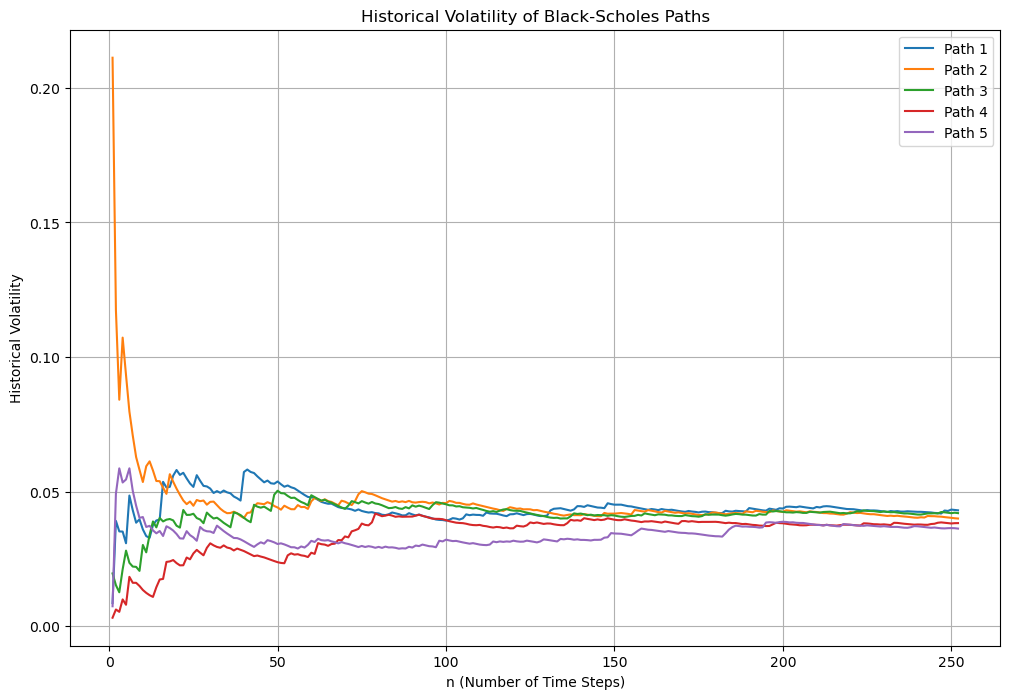

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_black_scholes_paths(S0, mu, sigma, T, N, num_paths):
    """
    Simulate paths of Black-Scholes model.

    :param S0: Initial stock price.
    :param mu: Expected return.
    :param sigma: Volatility.
    :param T: Total time.
    :param N: Number of time steps.
    :param num_paths: Number of paths to simulate.
    :return: A numpy array of simulated paths.
    """
    delta_t = T / N
    time_steps = np.linspace(0, T, N + 1)
    increments = np.random.normal(loc=(mu - 0.5 * sigma ** 2) * delta_t,
                                  scale=sigma * np.sqrt(delta_t),
                                  size=(num_paths, N))
    paths = S0 * np.exp(np.cumsum(increments, axis=1))
    paths = np.c_[np.full(num_paths, S0), paths]  # Adding S0 to the beginning of paths
    return time_steps, paths

def calculate_historical_volatility(paths, N):
    """
    Calculate historical volatility for each path.

    :param paths: Simulated paths.
    :param N: Number of time steps.
    :return: A list of numpy arrays containing historical volatilities.
    """
    volatilities = []
    for path in paths:
        log_returns = np.log(path[1:] / path[:-1])
        hist_vol = np.array([252 / n * np.sum(log_returns[:n]**2) for n in range(1, N + 1)])
        volatilities.append(hist_vol)
    return volatilities

# Parameters for the Black-Scholes model
S0 = 100  # Initial stock price
mu = 0.05  # Expected return
sigma = 0.2  # Volatility
T = 1  # Total time in years
N = 252  # Number of time steps
num_paths = 5  # Number of paths to simulate

# Simulate paths
time_steps, paths = simulate_black_scholes_paths(S0, mu, sigma, T, N, num_paths)

# Calculate historical volatilities
historical_volatilities = calculate_historical_volatility(paths, N)

# Plotting the results
plt.figure(figsize=(12, 8))
for i, hist_vol in enumerate(historical_volatilities):
    plt.plot(range(1, N + 1), hist_vol, label=f'Path {i + 1}')

plt.xlabel('n (Number of Time Steps)')
plt.ylabel('Historical Volatility')
plt.title('Historical Volatility of Black-Scholes Paths')
plt.legend()
plt.grid(True)
plt.show()

### Observations:

**Volatility Fluctuations**:  
For each path, the estimated historical volatility fluctuates as $ n $ increases. This is expected because each increment $ \left( X_{t_i} - X_{t_{i-1}} \right) $ adds new information about the asset's price movement, influencing the volatility estimate.

**Convergence**:  
As $ n $ approaches 252, the volatility estimates for each path tend to stabilize. This convergence suggests that including more data points provides a more consistent estimate of historical volatility.

**Path Dependency**:  
Different paths yield different volatility estimates, reflecting the variability in possible price trajectories of the underlying asset. This highlights the path-dependent nature of historical volatility.

**Annualization Factor**:  
The factor $ \frac{252}{n} $ annualizes the volatility estimate. As a result, even with a limited number of data points (small $ n $), the volatility is projected over a full year.

This analysis gives a practical demonstration of how historical volatility can be estimated from asset price data and how this estimate evolves as more data is included.

### Distribution of the value σ that makes the hedging of an ATM call perfect

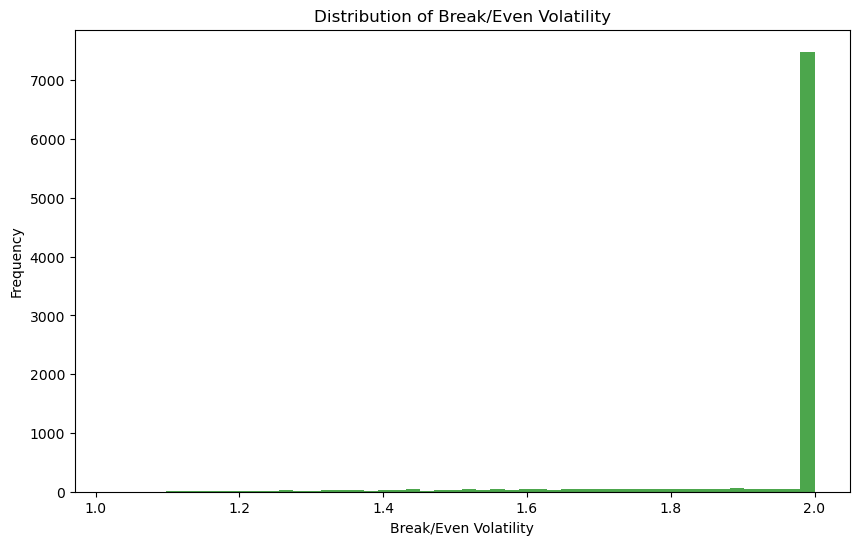

In [25]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm
import matplotlib.pyplot as plt

# Black-Scholes call price function
def black_scholes_call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Function to simulate Black-Scholes paths
def simulate_black_scholes_paths(S0, mu, sigma, T, N, num_paths):
    delta_t = T / N
    time_steps = np.linspace(0, T, N + 1)
    increments = np.sqrt(delta_t) * np.random.randn(num_paths, N)
    exponent = (mu - 0.5 * sigma ** 2) * delta_t + sigma * increments
    paths = S0 * np.cumprod(np.exp(exponent), axis=1)
    paths = np.concatenate((np.full((num_paths, 1), S0), paths), axis=1)
    return time_steps, paths

# Function to simulate the hedging portfolio for a single path
def simulate_hedging_portfolio(S0, K, r, sigma, T, N, path):
    delta_t = T / N
    portfolio_value = np.zeros(N + 1)
    # Calculate initial call price
    initial_call_price = black_scholes_call_price(S0, K, T, r, sigma).item()  # Ensure it's a scalar
    # Initial delta
    delta_0 = norm.cdf((np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))).item()  # Ensure it's a scalar
    portfolio_value[0] = -initial_call_price + delta_0 * S0
    # Update portfolio values
    for i in range(1, N + 1):
        delta = norm.cdf((np.log(path[i-1] / K) + (r + 0.5 * sigma ** 2) * (T - delta_t * (i-1))) / (sigma * np.sqrt(T - delta_t * (i-1)))).item()  # Ensure it's a scalar
        bond_investment = (portfolio_value[i-1] - delta * path[i-1]) * np.exp(r * delta_t)
        portfolio_value[i] = delta * path[i] + bond_investment
    return portfolio_value


# Function to find break-even volatility for a given path
def find_break_even_volatility(path, S0, K, r, T, N):
    def objective(sigma):
        # Simulate hedging portfolio with the given sigma
        hedging_portfolio_path = simulate_hedging_portfolio(S0, K, r, sigma, T, N, path)
        # Calculate the final hedging error
        final_hedging_error = hedging_portfolio_path[-1] - max(path[-1] - K, 0)
        return abs(final_hedging_error)

    # Initial guess for sigma
    initial_sigma = 0.2
    result = minimize(objective, initial_sigma, bounds=[(0.01, 2)])
    return result.x[0] if result.success else np.nan

# Parameters for the simulation
S0 = 100   # Initial asset price
K = S0     # Strike price
r = 0.05   # Risk-free interest rate
T = 1.0    # Time to maturity
N = 252    # Number of time steps
num_paths = 10000  # Number of paths

# Simulate paths of the underlying asset
_, asset_paths = simulate_black_scholes_paths(S0, 0.03, 0.25, T, N, num_paths)

# Compute the B/E volatility for each path
be_volatilities = np.array([find_break_even_volatility(asset_paths[i, :], S0, K, r, T, N) for i in range(num_paths)])

# Plotting the distribution of B/E volatilities
plt.figure(figsize=(10, 6))
plt.hist(be_volatilities, bins=50, alpha=0.7, color='green')
plt.title('Distribution of Break/Even Volatility')
plt.xlabel('Break/Even Volatility')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of the Break/Even (B/E) volatility computed over 10,000 simulated paths of a stock price $ S_t $. The B/E volatility is the volatility level at which the hedging of an at-the-money (ATM) call option is perfect, meaning that the initial cost of setting up the hedge is exactly offset by the gains from the hedge over the life of the option.

### Observation:

**Concentration at High Volatility**: The distribution is highly concentrated at a specific value of volatility close to 2.0. This indicates that for the vast majority of the paths, the B/E volatility is very close to this value.

**Low Variance**: The distribution has very low variance, as indicated by the extremely narrow width of the histogram. This suggests that the B/E volatility doesn't vary much across different paths and might be influenced by a stable factor in the hedging strategy or the characteristics of the option being hedged.

**Possible Bias**: The presence of a peak at the extreme end of the range could suggest a bias or an artifact of the calculation method. It might be the result of a boundary condition in the calculation or a feature of the market model or option parameters used in the simulation.

# Hedging with Historical Data

[*********************100%%**********************]  1 of 1 completed


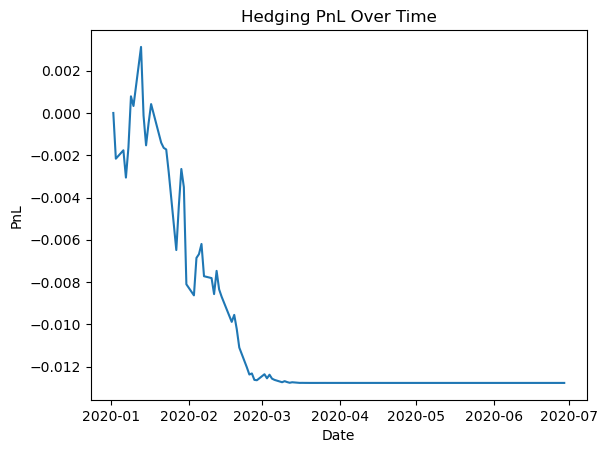

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm
from scipy.optimize import minimize

# Black-Scholes functions
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

def delta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

def delta_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return -norm.cdf(-d1)

# Fetch historical data for a liquid asset
def fetch_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Adj Close']

# Hedging simulation
def simulate_hedging(ticker, start_date, end_date, K, option_type='call', r=0.01, T=0.5):
    # Fetch data
    S = fetch_data(ticker, start_date, end_date)
    if S.empty:
        raise ValueError(f"No data returned for {ticker}. Check the ticker symbol, date range, and your internet connection.")
    N = len(S)
    dt = T / N
    
    # Set up initial option price and delta
    sigma = np.std(np.log(S).diff().dropna()) * np.sqrt(252)  # Historical volatility
    S0 = S.iloc[0]
    if option_type == 'call':
        price = black_scholes_call(S0, K, T, r, sigma)
        hedge = delta_call(S0, K, T, r, sigma)
    else:
        price = black_scholes_put(S0, K, T, r, sigma)
        hedge = delta_put(S0, K, T, r, sigma)
    
    # Set up the hedge portfolio
    cash = price - hedge * S0  # Initial cash position
    PnL = np.zeros(N)
    
    # Iterate over the time period
    for i in range(1, N):
        # Rebalance the hedge
        if option_type == 'call':
            new_hedge = delta_call(S.iloc[i], K, T - i*dt, r, sigma)
        else:
            new_hedge = delta_put(S.iloc[i], K, T - i*dt, r, sigma)
        
        # Update cash position
        dS = S.iloc[i] - S.iloc[i-1]
        cash += hedge * dS
        hedge = new_hedge
        
        # Update PnL
        if option_type == 'call':
            option_value = black_scholes_call(S.iloc[i], K, T - i*dt, r, sigma)
        else:
            option_value = black_scholes_put(S.iloc[i], K, T - i*dt, r, sigma)
        PnL[i] = cash + hedge * S.iloc[i] - option_value
    
    return S, PnL

# Test the hedging strategy
ticker = 'AAPL'  # Choose a liquid stock
start_date = '2020-01-01'
end_date = '2020-06-30'
strike_price = 300  # Example strike price
option_type = 'call'  # or 'put'

# Run the simulation
market_data, pnl = simulate_hedging(ticker, start_date, end_date, strike_price, option_type)

# Plot the results
plt.plot(market_data.index, pnl)
plt.xlabel('Date')
plt.ylabel('PnL')
plt.title('Hedging PnL Over Time')
plt.show()

### Explanations:
This code defines Black-Scholes pricing functions for calls and puts, and the corresponding delta functions. It fetches historical data for a specified ticker between two dates. It sets up a hedging simulation function that assumes we sell an option and hedge it using the Black-Scholes model.
- Historical volatility is used as the hedging volatility, which could be updated daily based on new price data.
- The code provided does not include a mechanism to update the volatility during the life of the trade. However, in a practical scenario, we might choose to update the volatility regularly by recalculating the historical volatility based on a rolling window of the most recent market data, or by taking the latest implied volatility from the market if we have access to options pricing data.
- The risk-free rate $r$ is set statically, but we might also choose it based on the current yields of government bonds in practice.
- It doesn't account for dividends. To include dividends, we would need to adjust the spot price `S` for the present value of expected dividends, or use an adjusted closing price that accounts for dividends.
- After running the simulation, it plots the PnL of the hedging strategy over time.